In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 4: Exponentially Weighted k-Nearest Neighbors

The **exponentially weighted knn** method uses all of the neighbors of a new point $x_{\rm new}$ rather than only the nearest $k$ neighbors. 
Each neighbor is assigned a weight, according to its distance to $x_{\rm new}$.

The weights are a function of a contant $\alpha$, a number bounded by zero and one.
The weight of the $i$th nearest neighbor is given by

$$
w_i = \alpha(1-\alpha)^{i-1} \quad \mbox{for }i=1,2,\ldots,n
$$

Large values of $\alpha$ place more weight on the nearest neighbors and produce weights that decay rapidly to zero, whereas the rate of decay is slower for smaller values of $\alpha$.
Notice that the nearest neighbor ($i=1$) receives the weight $w_1=\alpha$.

## Part 1

Implement the exponentially weighted knn method

In [2]:
def exp_knn_classifier(X,y,X_new,alpha):
    
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # number of classes
    n_classes = len(np.unique(y))        
    
    # distance matrix
    dist = np.sqrt(np.square(X_new).sum(axis=1).reshape([m_new,1])+np.square(X).sum(axis=1).reshape([1,m])-2*X_new.dot(X.T))
    
    # nearest neighbor
    knn = np.argsort(dist,axis=1)
    
    # labels
    nearest_labels = y[knn]
    
    # weights
    #w = alpha*(1-alpha)**knn
    w = alpha*(1-alpha)**np.arange(m)
    
    y_pred = np.zeros(m_new)
    for i in range(m_new):
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels[i], minlength=n_classes, weights=w))
    
    return y_pred

## Part 2: The MNIST dataset revisited

In [3]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5)

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [4]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

**Part 2-a:** Split the dataset into training and validation sets.

In [5]:
permutation = np.random.permutation(len(y))
X = X[permutation]
y = y[permutation]

In [6]:
X_train, y_train = X[0:3000], y[0:3000]
X_val, y_val = X[3000:5000], y[3000:5000]

**Part 2-b:** Use the validation set to tune-in the parameter $\alpha$.

In [7]:

alpha_list = [1/k for k in range(2,20)]
alpha_list

[0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842]

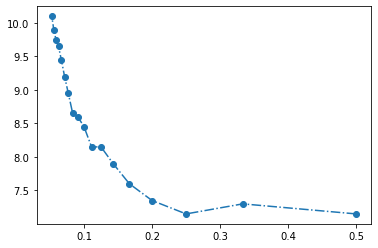

In [8]:
pct_incorrect = np.zeros(len(alpha_list))
for j in range(len(alpha_list)):
    y_val_pred = exp_knn_classifier(X_train,y_train,X_val,
                                    alpha=alpha_list[j])
    # percentage of incorrect classification
    pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
plt.plot(alpha_list, pct_incorrect,'o-.')

**Part 2-c:** Test your classifier on the following test set

In [9]:
# load test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
test_data = pd.read_csv(url)

In [10]:
X_test = test_data.iloc[:,0:784].to_numpy() # pixels
y_test = test_data['label'].to_numpy() # labels

In [11]:
# optimal alpha
alpha = alpha_list[1]

In [12]:
y_test_pred = exp_knn_classifier(X_train,y_train,X_test,alpha)

In [13]:
'confusion matrix'
n_classes = 10
C = np.zeros((n_classes,n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[202.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   1.],
       [  0., 222.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   6., 174.,   1.,   1.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   3.,   8., 174.,   0.,   3.,   0.,   2.,   5.,   0.],
       [  0.,   6.,   1.,   0., 176.,   1.,   2.,   0.,   0.,  18.],
       [  1.,   2.,   0.,   2.,   0., 171.,   3.,   0.,   4.,   2.],
       [  6.,   1.,   0.,   0.,   0.,   1., 186.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.,   1.,   0.,   0., 203.,   0.,   5.],
       [  1.,   9.,   0.,   7.,   1.,   2.,   3.,   1., 151.,   8.],
       [  0.,   2.,   0.,   4.,   3.,   0.,   0.,   2.,   0., 204.]])

In [14]:
# percentage of correct classification
100*np.sum(y_test==y_test_pred)/len(y_test)

93.15